In [2]:
import scipy.io
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import pickle as pk

In [3]:
#Loading the matlab datatset
data = scipy.io.loadmat('MNIST.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'train_fea', 'train_gnd', 'test_fea', 'test_gnd'])


In [4]:
#normalizing the values
training_set = data['train_fea']
training_label = data['train_gnd']
testing_set = data['test_fea']
testing_label = data['test_gnd']

print(training_set.shape)
print(testing_set.shape)
print(training_set[0])

(60000, 784)
(10000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 

In [5]:
value = 1
training_set[training_set != 0] = value
testing_set[testing_set != 0] = value

In [6]:
# plt.imshow(training_set[58000][0:785].reshape(28,28), cmap='gray')
# plt.show()

#replace all labels with 10 to 0
training_label[training_label > 9] = 0
testing_label[testing_label > 9] = 0

In [7]:
#adding the labels to 1 set.
training = np.append(training_set, training_label, axis=1)

In [8]:
# #Shuffling the training set and parsin into training and validation
Base = sorted(training, key=lambda k: random.random())
Base = np.array(Base).reshape(60000, 785)

training = Base[0:55000]
validation = Base[55000:60000]

In [9]:
# print(validation.shape)
validation[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,

In [10]:
#Split into X and y
X = training[:,0:784]

y = training[:,784]

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
base = DecisionTreeClassifier()
base.fit(X,y)
base.score(testing_set, testing_label)

0.8901

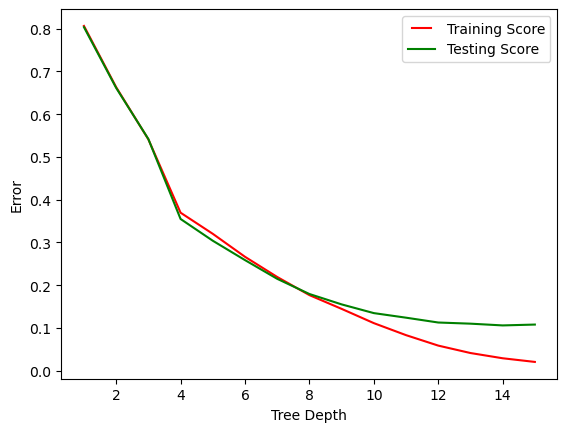

In [17]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

train_results = []
test_results = []
list_nb_trees = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for nb_trees in list_nb_trees:
    modelG = DecisionTreeClassifier(max_depth= nb_trees)
    modelG.fit(X, y)

    train_results.append(1 - (modelG.score(X,y)))
    test_results.append(1 - (modelG.score(testing_set, testing_label)))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('Tree Depth')
fig = plt.gcf()
plt.show()
fig.savefig('TreeBaseModelLeNet5.png')

In [18]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from xgboost import XGBClassifier

In [12]:
model = XGBClassifier()
model.fit(X, y)

filename = f'PIKLE/XGBOOST'
pk.dump(model, open(filename, 'wb'))

In [11]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [15]:
model.score(validation[:,0:784], validation[:,784])

0.978

In [15]:
model_1 = XGBClassifier(eta = 0.2, max_depth = 10, n_estimators=100)
model_1.fit(X, y)
filename = f'PIKLE/XGBOOST_Test'
pk.dump(model_1, open(filename, 'wb'))

In [18]:
model_1.score(validation[:,0:784], validation[:,784])

0.976

In [17]:
# model_1.score(training[:,0:784], training[:,784])

model_1.score(testing_set, testing_label)

0.9743

In [19]:
import pickle as pk
file = open('XGBOOST_1_Final', 'rb')
loadModel = pk.load(file)
file.close()

In [20]:
# loadModel.score(validation[:,0:784], validation[:,784])
loadModel.score(testing_set, testing_label)

0.9713

In [97]:
loadModel.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=784, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)>

In [20]:
model_2 = XGBClassifier(eta = 0.2, gamma = 2, max_depth = 10, n_estimators=784, subsample=0.5, reg_lambda = 2)
model_2.fit(X, y)
filename = f'XGBOOST_2'
pk.dump(model_2, open(filename, 'wb'))

In [21]:
model_2.score(training[:,0:784], training[:,784])

0.9958

In [22]:
model_2.score(validation[:,0:784], validation[:,784])

0.975

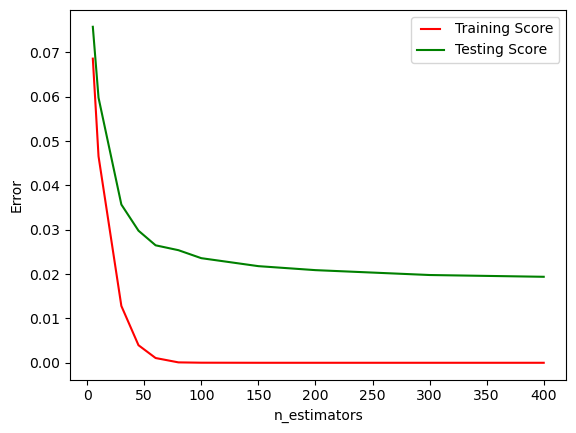

In [25]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

train_results = []
test_results = []
list_nb_trees = [5, 10, 30, 45, 60, 80, 100, 150, 200, 300, 400]

for nb_trees in list_nb_trees:
    modelG = XGBClassifier(n_estimators= nb_trees)
    modelG.fit(X, y)

    train_results.append(1 - (modelG.score(X,y)))
    test_results.append(1 - (modelG.score(testing_set, testing_label)))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('n_estimators')
fig = plt.gcf()
plt.show()
fig.savefig('XGBoostBaseModel.png')

In [19]:
plt.savefig('destination_path.eps', format='eps')

<Figure size 640x480 with 0 Axes>

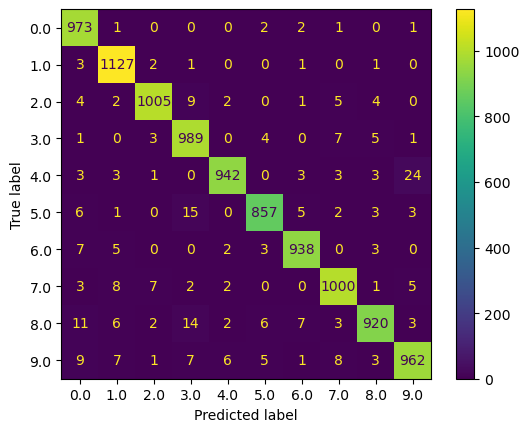

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = loadModel.predict(testing_set)
cm = confusion_matrix(testing_label, predictions, labels=loadModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=loadModel.classes_)
disp.plot()
fig = plt.gcf()
plt.show()
fig.savefig('XGBoostBaseModelConfusionMatrix.png')